In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import missingno
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
filename = "insurance.csv"
df = pd.read_csv(filename)
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.index

RangeIndex(start=0, stop=1338, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Transforming the object Dtypes to int64 

df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

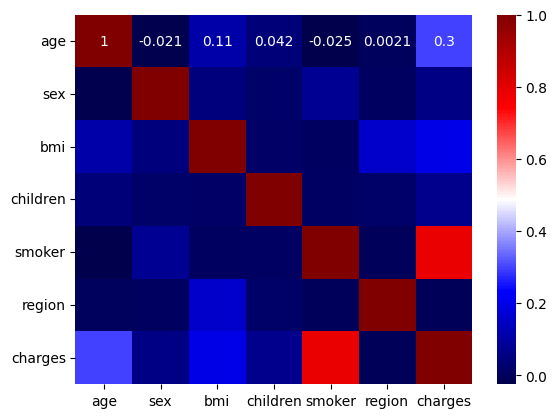

In [8]:
sns.heatmap(df.corr(), annot = True, cmap = 'seismic')

In [40]:
# charges is a dependent variable
X_feature = df.drop("charges", axis =1)  # Input matrix
X_feature

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [41]:
y_target = df['charges']  # target/output vector
y_target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

<Axes: xlabel='age', ylabel='charges'>

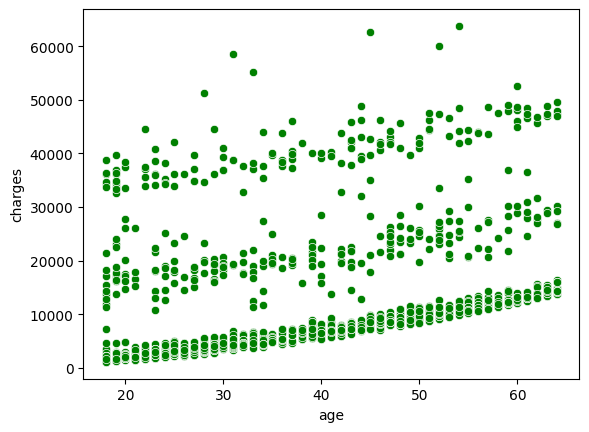

In [16]:
# Visualization on scatter plot

sns.scatterplot(data = X_feature, x = X_feature['age'] , y= y_target, color = 'g' )

<Axes: xlabel='age', ylabel='charges'>

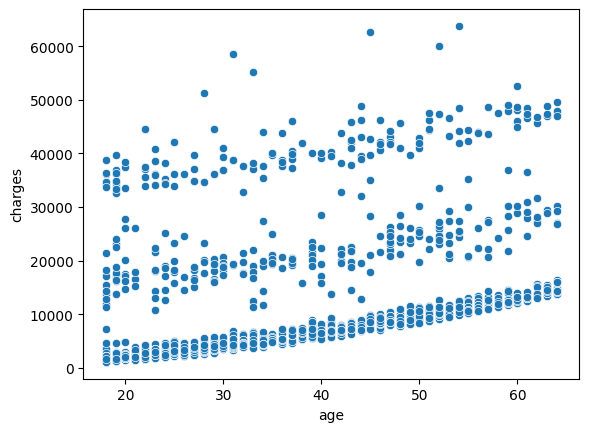

In [36]:
# Or Plot a scatter plot with age on the X-axis and charges on the Y-axis

sns.scatterplot(data = df, x = 'age' , y = 'charges')

In [13]:
X_feature.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

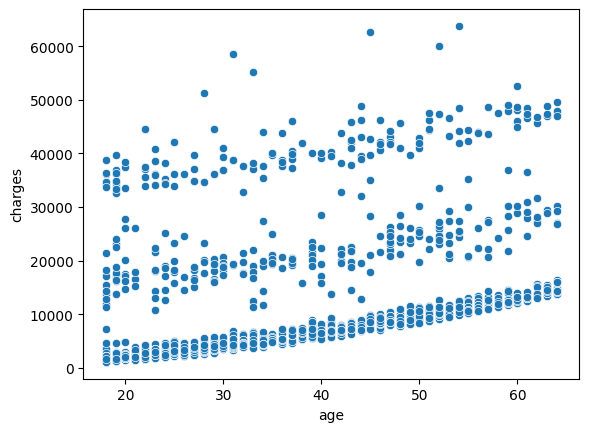

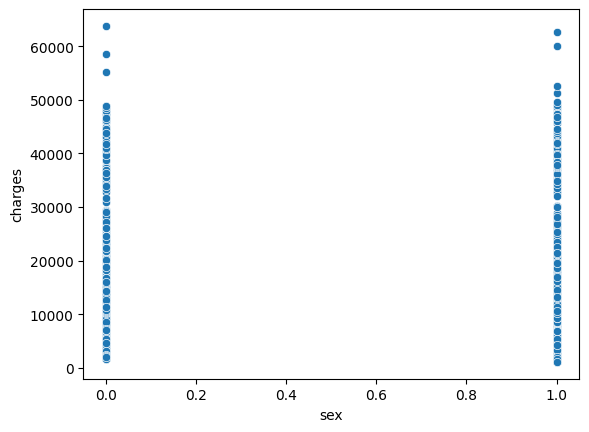

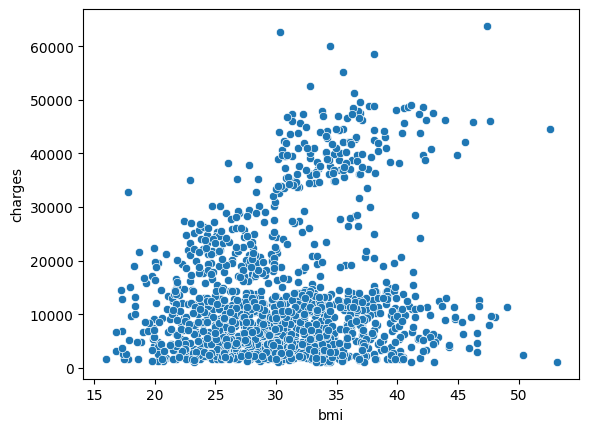

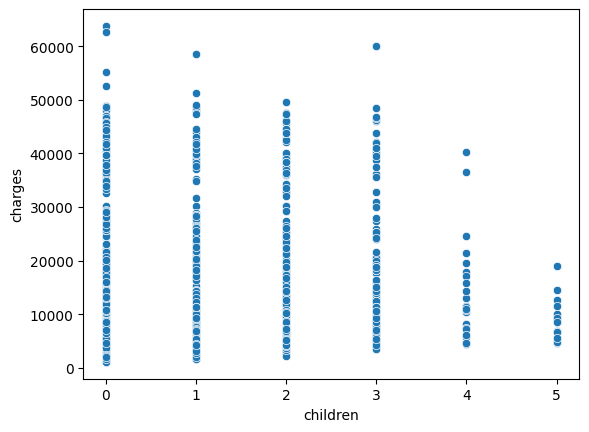

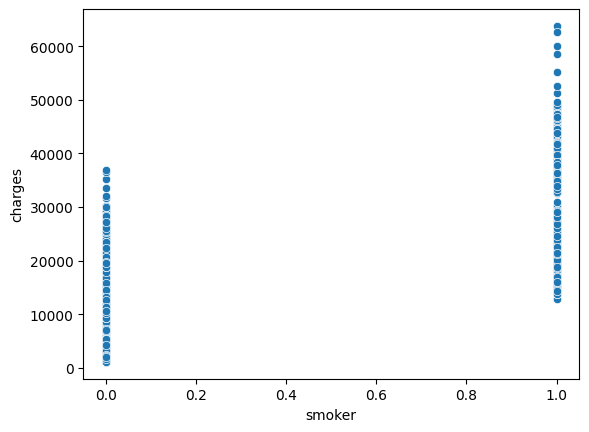

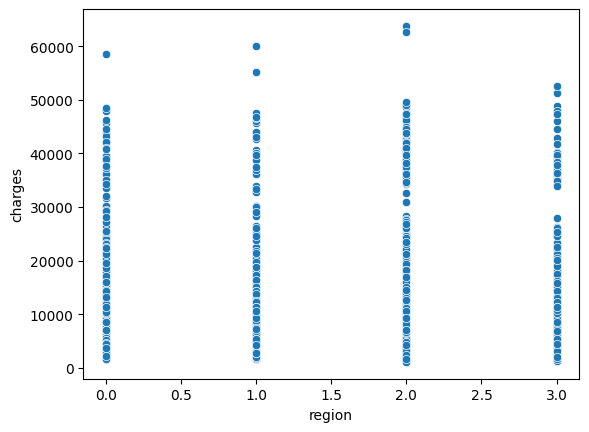

In [17]:
for col in X_feature.columns:
  sns.scatterplot(data = X_feature, x = col, y = y_target)
  plt.show()

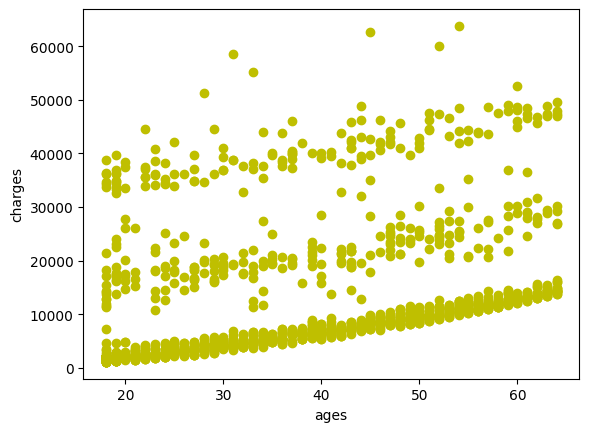

In [18]:
# Using the iloc function to verify my approach earlier

x = df.iloc[:,:1].values
y = df.iloc[:,-1].values
plt.scatter(x,y,color = 'y')
plt.xlabel('ages')
plt.ylabel('charges')
plt.show()

In [42]:
# Using linear_model.LinearRegression() from sklearn, fit a model to your data, and make predictions.
# Creating an empty linear regression model 

insurance_model = LinearRegression()
insurance_model.fit(X_feature, y_target)


LinearRegression()

In [37]:
# Extracting constants

print('Intercept:', insurance_model.intercept_)
print('Coefficient:', insurance_model.coef_)

Intercept: -11815.452321231362
Coefficient: [  257.28807486  -131.11057962   332.57013224   479.36939355
 23820.43412267  -353.64001656]


In [ ]:
# Linear Regression Model

# y           = b0 + b1x1         + b2x2          + b3x3        + b4x4           + b5x5            + b6x6
# insurance   = b0 + b1 'age'     + b2 'sex'    + b3 'bmi'    + b4 'children'  + b5 'smoker'   + b6 'region'
# insurance   = -11815.452321231362 + 257.28807486 'age'  +  -131.11057962 'sex' + 332.57013224 'bmi' + 479.36939355 'children' + 23820.43412267 'smoker' + -353.64001656 'region' 

In [32]:
X_feature.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
# 1

# insurance   = -11815.452321231362 + 257.28807486 'age'  +  -131.11057962 'sex' + 332.57013224 'bmi' + 479.36939355 'children' + 23820.43412267 'smoker' + -353.64001656 'region' 
# insurance   = -11815.452321231362 + 257.28807486 (31)  +  -131.11057962 (1)  + 332.57013224 (42)  + 479.36939355 (5)  + 23820.43412267 (1) + -353.64001656 (3) 
# insurance   = 35153.67401

In [ ]:
# 2 but increasing age by 1 year

# insurance   = -11815.452321231362 + 257.28807486 'age'  +  -131.11057962 'sex' + 332.57013224 'bmi' + 479.36939355 'children' + 23820.43412267 'smoker' + -353.64001656 'region' 
# insurance   = -11815.452321231362 + 257.28807486 (32)  +  -131.11057962 (1)  + 332.57013224 (42)  + 479.36939355 (5)  + 23820.43412267 (1) + -353.64001656 (3) 
# insurance   = 35410.96209

In [35]:
difference = 35410.96209 - 35153.67401
difference 

257.28807999999844

We realize that increasing age by 1 year does astronomical effects on the insurance keeping everything else constant. So the coeffiecient tells us how much insurance changes when that variable is increased by 1. 

In [45]:
# Data Splitting into Train and Test using 70% & 30% split size

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_feature, y_target, test_size = 0.3, random_state = 42 )

print ("Training data: ", X_train.shape, y_train.shape)
print ("Test data: ", X_test.shape, y_test.shape)



Training data:  (936, 6) (936,)
Test data:  (402, 6) (402,)


In [47]:
# Initialize the multiple rregression model

multi_reg_model = LinearRegression()

In [48]:
# Fit the model to the training data
multi_reg_model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predicting the insurance charges on the test set

y_pred = multi_reg_model.predict(X_test)

In [50]:
# Now let's consider the performance metrics

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 33805466.898688614
R-squared: 0.7694415927057693
Mean Absolute Error: 4155.239843059383


Judging from our results mse (discrepancy between what model the predicted and what actual value is) has gone parabolic with its numbers showing our model has extremely abysmal performance. 

For mae, which is the difference between predicted and actual values but instead of squaring the difference, we maintained the absolute value of the difference. And like mse we equally need lower values for mae to achieve an impressive model performance. 

Lastly R2 which represents the proportion of variance in the target (dependent) variable that can be explained by the independent variables/model. Therefore, the more variation we show and explain the higher propensity our model can perform ie. predict. And our r2 value of 0.769442(appx) is closer to 1 indicates better fit of the model. Hence 76% of our variation in charges can be explained with our chosen features turning out to be good at capturing the variance in charges. Such evidence therefore shows we have a good model.

Text(0.5, 1.0, 'Actual vs. Predicted Insurance Charges')

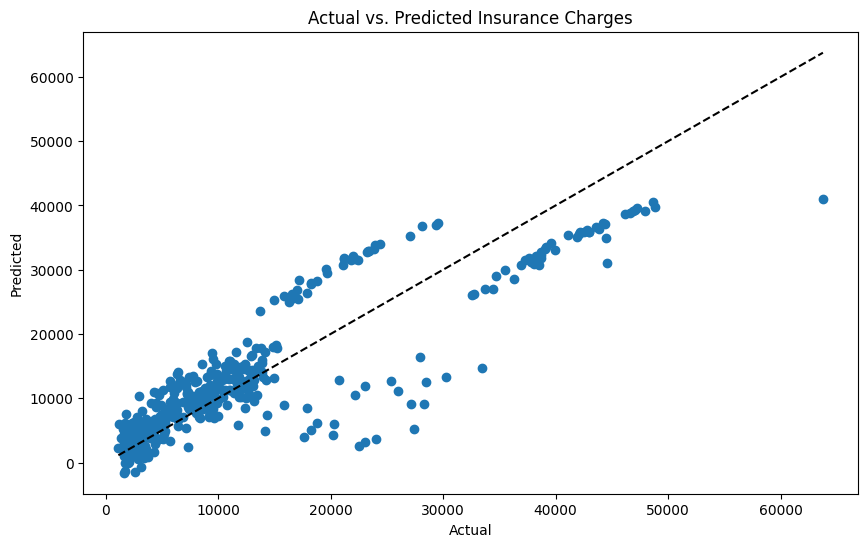

In [53]:
y_pred = multi_reg_model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Insurance Charges')